In [24]:
# extract patches from image
import math 
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def extract_patches(image, patch_size=32, image_channel=3):
    # resize image so that it's dimensions are dividable by patch_height and patch_width
    if image_channel == 3:
        h, w,_ = image.shape
    else:
        h, w = image.shape
        
    height = math.ceil(h/patch_size)*patch_size
    width = math.ceil(w/patch_size)*patch_size
    image = cv.resize(image, (height, width))
    
    patches = tf.image.extract_patches(images=tf.expand_dims(image,0),
                           sizes=[1, patch_size, patch_size, 1],
                           strides=[1, patch_size, patch_size, 1],
                           rates=[1, 1, 1, 1],
                           padding='SAME')
    _,x,y,_ = patches.shape 
    list = []
    for imgs in patches:
      for r in range(x):
          for c in range(y):
              list.append(np.array(tf.reshape(imgs[r,c],shape=(patch_size,patch_size, image_channel))))
    return list

In [25]:
# reconstruct image from patches
def reconstruct_patches(patches):
    hstack = []
    count = 0
    for patch in patches:
        if count == 0:
            stack = patch
            count += 1
        elif count < math.sqrt(len(patches)):
            stack = np.hstack((stack, patch))
            count += 1
        else:
            hstack.append(stack)
            count = 1
            stack = patch
    hstack.append(stack)
    count = 0
    for stack in hstack:
        if count == 0:
            vstack = stack
        else:
            vstack = np.vstack((vstack, stack))
        count += 1
    return vstack

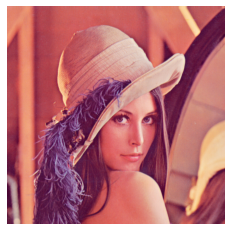

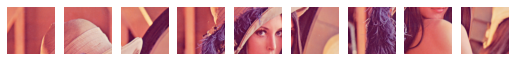

In [28]:
# testing extract method 
original = cv.imread('./lenna.png')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
original = original / 255
plt.axis('off')
plt.imshow(original)
plt.show()

# display patches 
patches = extract_patches(original, 200, 3)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(patches[i])
plt.show()

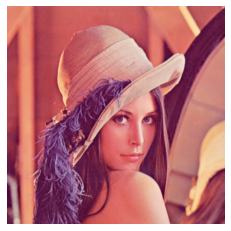

In [35]:
# testing reconstruct image from patches 
reconstructed = reconstruct_patches(patches)
plt.axis('off')
plt.imshow(reconstructed)
plt.show()